In [1]:
# don't run any upgrade you will regret it 
import os 

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'
PRETRAINED_MODEL_NAME ='ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow','workspace'),
    'SCRIPTS_PATH':os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH':os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH':os.path.join('Tensorflow','workspace','annotations'),
    'IMAGE_PATH':os.path.join('Tensorflow','workspace','images'),
    'MODEL_PATH':os.path.join('Tensorflow','workspace','models'),
    'PRETRAINED_MODEL_PATH':os.path.join('Tensorflow','workspace','pre-trained-models'),
    'CHECKPOINT_PATH':os.path.join('Tensorflow','workspace','models',CUSTOM_MODEL_NAME),
    'OUTPUT_PATH':os.path.join('Tensorflow','workspace','models',CUSTOM_MODEL_NAME,'export'),
    'TFJS_PATH':os.path.join('Tensorflow','workspace','models',CUSTOM_MODEL_NAME,'tfjsexport'),
    'TFLITE_PATH':os.path.join('Tensorflow','workspace','models',CUSTOM_MODEL_NAME,'tfliteexport'),
    'PROTOC_PATH':os.path.join('Tensorflow','protoc'),
}

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

## Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [10]:
'''🏁 Final working stack (Windows-safe, confirmed)

Python 3.9

TensorFlow 2.12.0

Keras (bundled with TF)

NumPy 1.23.5

protobuf 3.20.3

protoc 3.20.x

tensorflow-io 0.31.0

tf-models-official 2.12.0 (no-deps)

tensorflow-addons 0.20.0

PyYAML 5.4.1

matplotlib installed'''

# https://www.tensorflow.org/install/source_windows

'🏁 Final working stack (Windows-safe, confirmed)\n\nPython 3.9\n\nTensorFlow 2.12.0\n\nKeras (bundled with TF)\n\nNumPy 1.23.5\n\nprotobuf 3.20.3\n\nprotoc 3.20.x\n\ntensorflow-io 0.31.0\n\ntf-models-official 2.12.0 (no-deps)\n\ntensorflow-addons 0.20.0\n\nPyYAML 5.4.1\n\nmatplotlib installed'

In [11]:
if os.name=='nt':
    !uv add wget
    import wget

Resolved 121 packages in 2ms
Audited 101 packages in 437ms


In [12]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [13]:
# # ============================================================
# # TensorFlow Object Detection API – FULL AUTOMATED INSTALL
# # Windows | Python 3.9 | TensorFlow 2.12 | CPU (STABLE)
# # ============================================================

# import os
# import sys
# import shutil
# import subprocess
# import zipfile
# import urllib.request

# # -------------------------------
# # HELPER
# # -------------------------------
# def run(cmd):
#     print("\n▶", " ".join(cmd))
#     subprocess.run(cmd, check=True)

# # -------------------------------
# # 0️⃣ LOCATE PROJECT ROOT
# # -------------------------------
# if os.path.basename(os.getcwd()) == "research":
#     MODELS_RESEARCH = os.getcwd()
#     PROJECT_ROOT = os.path.abspath(os.path.join(MODELS_RESEARCH, "..", "..", ".."))
# else:
#     PROJECT_ROOT = os.getcwd()
#     MODELS_RESEARCH = os.path.join(PROJECT_ROOT, "Tensorflow", "models", "research")

# print("Project root:", PROJECT_ROOT)
# print("Models research:", MODELS_RESEARCH)

# # -------------------------------
# # 1️⃣ CLEAN BROKEN PACKAGES
# # -------------------------------
# print("\n[1/7] Cleaning incompatible packages")

# run([
#     sys.executable, "-m", "pip", "uninstall", "-y",
#     "tensorflow", "keras", "tensorflow-estimator",
#     "tensorflow-addons", "tf-models-official",
#     "tensorflow-text", "tensorflow-io"
# ])

# # -------------------------------
# # 2️⃣ INSTALL STABLE TF STACK
# # -------------------------------
# print("\n[2/7] Installing TensorFlow 2.12 compatible stack")

# run([
#     sys.executable, "-m", "pip", "install",
#     "tensorflow==2.12.0",
#     "keras==2.12.0",
#     "tensorflow-estimator==2.12.0",
#     "tensorflow-addons==0.20.0",
#     "tensorflow-io==0.31.0",
#     "protobuf==3.20.3",
#     "matplotlib",
#     "pyyaml",
#     "pillow",
#     "lxml",
#     "cython",
#     "contextlib2",
#     "tqdm"
# ])

# # -------------------------------
# # 3️⃣ INSTALL tf-models-official (NO DEPS)
# # -------------------------------
# print("\n[3/7] Installing tf-models-official (NO DEPENDENCIES)")

# run([
#     sys.executable, "-m", "pip", "install",
#     "--no-deps",
#     "tf-models-official==2.12.0"
# ])

# # -------------------------------
# # 4️⃣ INSTALL PROTOC 3.20.3
# # -------------------------------
# print("\n[4/7] Installing protoc 3.20.3")

# PROTOC_DIR = os.path.join(PROJECT_ROOT, "Tensorflow", "protoc")
# PROTOC_BIN = os.path.join(PROTOC_DIR, "bin", "protoc.exe")

# if os.path.exists(PROTOC_DIR):
#     shutil.rmtree(PROTOC_DIR)

# os.makedirs(PROTOC_DIR, exist_ok=True)

# zip_name = "protoc-3.20.3-win64.zip"
# zip_url = f"https://github.com/protocolbuffers/protobuf/releases/download/v3.20.3/{zip_name}"
# urllib.request.urlretrieve(zip_url, zip_name)

# with zipfile.ZipFile(zip_name, "r") as z:
#     z.extractall(PROTOC_DIR)

# os.remove(zip_name)

# os.environ["PATH"] = os.path.join(PROTOC_DIR, "bin") + os.pathsep + os.environ["PATH"]
# run([PROTOC_BIN, "--version"])

# # -------------------------------
# # 5️⃣ COMPILE PROTOS
# # -------------------------------
# print("\n[5/7] Compiling protobuf files")

# proto_dir = os.path.join(MODELS_RESEARCH, "object_detection", "protos")
# for f in os.listdir(proto_dir):
#     if f.endswith("_pb2.py"):
#         os.remove(os.path.join(proto_dir, f))

# os.chdir(MODELS_RESEARCH)
# run(["protoc", "object_detection/protos/*.proto", "--python_out=."])

# # -------------------------------
# # 6️⃣ INSTALL OBJECT DETECTION API
# # -------------------------------
# print("\n[6/7] Installing Object Detection API")

# run([
#     sys.executable, "-m", "pip", "install",
#     "--force-reinstall", "--no-deps", "."
# ])

# run([
#     sys.executable, "-m", "pip", "install", "-e", "slim"
# ])

# # -------------------------------
# # 7️⃣ VERIFY INSTALL
# # -------------------------------
# print("\n[7/7] Running verification tests")

# test_script = os.path.join(
#     MODELS_RESEARCH,
#     "object_detection",
#     "builders",
#     "model_builder_tf2_test.py"
# )

# run([sys.executable, test_script])

# print("\n🎉 SUCCESS: TensorFlow Object Detection API installed correctly!")


In [14]:
VERIFICATION_SCRIPT = r"D:\zMachineLearning\MLProjects\RealObjectDetection\Tensorflow\models\research\object_detection\builders\model_builder_tf2_test.py"
#if you wanna run varification test just uncomment bottom line
#!python "{VERIFICATION_SCRIPT}"

In [6]:
import object_detection

In [7]:
import tarfile
# ------------------------------------
# DOWNLOAD & EXTRACT PRETRAINED MODEL
# ------------------------------------

# Ensure pretrained model directory exists
os.makedirs(paths['PRETRAINED_MODEL_PATH'], exist_ok=True)

# Output archive path
archive_path = os.path.join(
    paths['PRETRAINED_MODEL_PATH'],
    PRETRAINED_MODEL_NAME + ".tar.gz"
)

print("Downloading pretrained model...")
print("URL:", PRETRAINED_MODEL_URL)
print("Saving to:", archive_path)

# -------------------------------
# DOWNLOAD
# -------------------------------
if not os.path.exists(archive_path):
    wget.download(PRETRAINED_MODEL_URL, archive_path)
    print("\nDownload complete.")
else:
    print("Archive already exists. Skipping download.")

# -------------------------------
# EXTRACT
# -------------------------------
print("\nExtracting model...")

with tarfile.open(archive_path, "r:gz") as tar:
    tar.extractall(path=paths['PRETRAINED_MODEL_PATH'])

print("Extraction complete.")

# -------------------------------
# VERIFY
# -------------------------------
extracted_dir = os.path.join(
    paths['PRETRAINED_MODEL_PATH'],
    PRETRAINED_MODEL_NAME
)

if os.path.exists(extracted_dir):
    print("\n✅ Pretrained model ready at:")
    print(extracted_dir)
else:
    raise RuntimeError("❌ Extraction failed – folder not found.")


URL: http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Saving to: Tensorflow\workspace\pre-trained-models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Archive already exists. Skipping download.

Extracting model...
Extraction complete.

✅ Pretrained model ready at:
Tensorflow\workspace\pre-trained-models\ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8


## |Create Label Map

In [8]:
# This label Map file maps labels into numerical value so that model can use them

labels = [
    {'name': 'ThumbsUp', 'id': 1},
    {'name': 'ThumbsDown', 'id': 2},
    {'name': 'Thankyou', 'id': 3},
    {'name': 'LiveLong', 'id': 4},
]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write("item {\n")
        #oh backslash so we can escape string "" this we need name inside "" but string starts and ends with ""
        f.write(f"  name: \"{label['name']}\"\n")
        f.write(f"  id: {label['id']}\n")
        f.write("}\n\n")

print("✅ label_map.pbtxt created successfully")


✅ label_map.pbtxt created successfully


## Creating tfrecords file

In [18]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [19]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [20]:
!uv add pandas

Resolved 121 packages in 2ms
Audited 101 packages in 9ms


In [21]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


## copy config file to training path

In [22]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


## Update Config For Transfer Learning

In [14]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [15]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [16]:
config

{'model': ssd {
   num_classes: 4
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [17]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [18]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [19]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

## Train the Model

In [20]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [21]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [22]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


In [23]:
#!{command}

## evaluate the moel

In [24]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])


In [25]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [26]:
!{command}

^C


## Import and perform detections

In [27]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

D:\zMachineLearning\MLProjects\RealObjectDetection\.venv\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [28]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

## Now lets detect

In [29]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [31]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'thankyou.72ed8f52-f924-11f0-9269-813a3aa2e978.jpg')

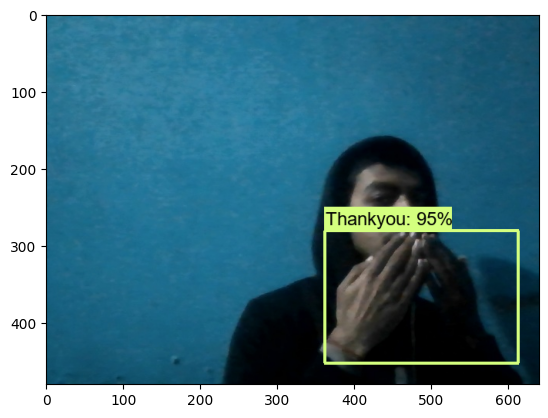

In [32]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

## Real Time obejct detection

In [ ]:
#!pip uninstall opencv-python-headless -y

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    
    image_np = np.array(frame)
    #so bottom line is bcz tensorflow requires batch so adding extra will say batch of 1 batch of 2 images etc
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

## Freezing the Graph

In [43]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [44]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [45]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [46]:
!{command}

D:\zMachineLearning\MLProjects\RealObjectDetection\.venv\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0126 19:54:40.372128 19788 deprecation.py:641] From D:\zMachineLearning\MLProjects\RealObjectDetection\.venv\lib\site-packages\tensorflow\python\autograph\impl\api.py:458: calling map_fn_v2 (from tensorflow.pyth

## Conversion to tfjs for javascript

In [47]:
!uv add tensorflowjs

Resolved 143 packages in 13.39s
Prepared 4 packages in 1.65s
Uninstalled 3 packages in 182ms
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 5 packages in 461ms
 - ipykernel==6.31.0
 + ipykernel==6.29.5
 - packaging==26.0
 + packaging==20.9
 + tensorflow-hub==0.12.0
 + tensorflowjs==3.18.0
 - wheel==0.46.3
 + wheel==0.45.1


In [48]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [49]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [50]:
!{command}

Writing weight file Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport\model.json...


## Conversion to tflite for raspberrypi

In [52]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [53]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [54]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [55]:
!{command}

D:\zMachineLearning\MLProjects\RealObjectDetection\.venv\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
I0126 19:58:53.608240  8376 api.py:459] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I0126 19:58:58.434422  8376 api.py:459] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
I0126 19:59:00.495472  8376 api.py:459] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
W0126 19:59:01.796421  8376 save_impl.py:66] Skipping full serialization of Keras layer <object_detection.met

In [56]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [57]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [58]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [60]:
!{command}

2026-01-26 20:04:32.896269: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2026-01-26 20:04:32.896325: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.


## zip and export folder

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')